# Day 18

In [44]:
def neighbours(world, loc):
    x, y = loc
    rels = [
        (-1, -1),
        (0, -1),
        (1, -1),
        (-1, 0),
        (1, 0),
        (-1, 1),
        (0, 1),
        (1,1)
    ]
    ns = []
    for xi, yi in rels:
        
        if x+xi < 0 or y+yi < 0:
            continue
        else:
            try:
                ns.append(world[y+yi][x+xi])
            except IndexError:
                continue
    return ns


In [45]:
data = """.#.#...|#.
.....#|##|
.|..|...#.
..|#.....#
#.#|||#|#|
...#.||...
.|....|...
||...#|.#|
|.||||..|.
...#.|..|."""

In [46]:
world = [list(r) for r in data.split('\n')]

neighbours(world, (5, 0))

['.', '.', '.', '#', '|']

In [47]:
data =""".||..#.#.#..#..#|...#|....|.|.#.###....##.|#..#...
..##||.#......|#...#.|..#.....##|.#.##|...|.|.#..#
##||.#..#.#...|..|...||.||...#|.#....|..|.#|..|#|#
....||..#...|||.#...|.|...|.#.|...##.#||.#.......#
.|.....#.||.#|#.#..|..#..#.|...||.##|.#......#..#|
|..|...#..#.|#|.#......|.||||.#....#....#|||..#..|
..#..#.#..#....|#|#||....|.#.#...||#..|.|.##..#|.|
....#.|...#|..#.|.#...|..#|.##.#......##.#....##..
.#..|.|.#..||....||....|.||.##.|#|#||.#...|.|.|||#
##..##|....|.|#.....|...........|#.|........|...|.
||.|...#.#...#....|.#|..##.|......|#..#.#.##..#|#.
|....|.#|#|....#...|...#.|#|..||.||##..##..|#|##..
|.||..#.#..|.#......|#..##|...#....|#.......#...|.
.|#......||.......|..||..#..#|..|..|.#.|.#.|......
.#.#.|.|.#.....|.|..|.###..|#....#.||..|..|.......
.|.......|##|.#.....|.|..|.##.||###.#.|..##|...|..
|#...##..||..|..|#.|...|....||.......|#.|...|.|.|.
..#.||#....#....||.|....#.#....#...|...#...#|.#.#.
|...|.#|..|||.|.#.#..#.|.|....#...#.##..#....|#.|#
#|#|..#.....|#||.....#|.|.#.||..||.|||.#|#||#|.|..
.....#|..|.##|....|.#..|.#.#...#...#....|.#|...|#.
#..|#.##..|..###.#|.||..#.#|#||.#|##.#..#.#.|.....
|.#.....##...|..###|...##|......##|#|.....#..|..#.
.|..|..|...#.|......|#|.........|....|#........|..
.#....|#.|...|.....|#.#...|.|###.|..##|.#|.#.|....
.......#|#||||#.|..|.#|||.#..#...##..#..#..#|#.#.#
|#...|||.||.....#.|##........|#|..|.##||..|.....|#
.|#|.||....###..#.#..|.....|.##..||.###.|...#....#
.#..#..||.....#.#..||#.#....#.||..|.#.|.|...|...#.
..#|#...||..#....#|..|..#.#.......|#####.|.##..|..
..|.|.||....#|#.......|.|.#...|.|||#|..#..#.#...##
||..#....#..||#....|..|.||#|.|##|.|#|.|#..|...#|..
#...|#..#..#....|...#.#.......#..#...|..|#||..|...
......#||#...#|###.#|.|...#..###|.|#..|..|...#..#|
.|...#....|#.#..#......#|...|.##.#|||.###.#|...#|#
..||..##.#|.#.....#...|..#..|.#..|#...|.#..||...##
...##.|.....##......##.##.#.##|##.|..|.#...#.#.|||
...#|#....#.....|.#.|...|||.#|.|#......|#...|#....
...........#|....|.##...|##|..|#|#|.|#.|...#......
....|..|..#..|#...#..#.###...###....####..##.##...
.##|.....#....|...|#..|..|#..|.|...#....#||....#..
#..#|#|..|.#....|..#..|#.#....#.#.||..#.#.#||#...|
||...|.|.|.||#.......|.#..#.|.#...#.||.||.#.|.|..#
...#....|.......#...||.......|.....#...........|#.
...#.#..##...|....#.|.|.#......#.|||....#.|.|...|.
.##|.|...#|...#.|.#|.|...|#...#....|#.#.|#..#|||..
###|.#.|#.|.|.#.||#.|.........|#...#.#....|#....#.
.#.........|....#.|...#..#...|.|......|.|.|..||...
|#...|....|||.#.||||.#|...#.#..|.......#....#.#...
#|#.##.#.#.|...|....#.###....|..#....#.....|#.||.."""

- An open acre will become filled with trees if three or more adjacent acres contained trees. Otherwise, nothing happens.
- An acre filled with trees will become a lumberyard if three or more adjacent acres were lumberyards. Otherwise, nothing happens.
- An acre containing a lumberyard will remain a lumberyard if it was adjacent to at least one other lumberyard and at least one acre containing trees. Otherwise, it becomes open.


In [5]:
def pprint(world):
    for r in world:
        print(''.join(r))
    return

In [56]:
import copy

world = [list(r) for r in data.split('\n')]

def play(world, time):

    scores = []

    for _ in range(time):
        w = copy.deepcopy(world)
        for y, row in enumerate(world):
            for x, e in enumerate(row):
                ns = neighbours(world, (x, y))
                if e == '.' and ns.count('|') >= 3:
                    w[y][x] = '|'
                elif e == '|' and ns.count('#') >= 3:
                    w[y][x] = '#'
                elif e == '#':
                    if ns.count('#') >= 1 and ns.count('|') >= 1:
                        w[y][x] = '#'
                    else:
                        w[y][x] = '.'
        world = copy.deepcopy(w)
        c = [(r.count('|'), r.count('#')) for r in world]
        cw, cl = sum(x[0] for x in c), sum(x[1] for x in c)
        scores.append(cw * cl)
        
    return world, scores

In [57]:
world, scores = play(world, time=1000)

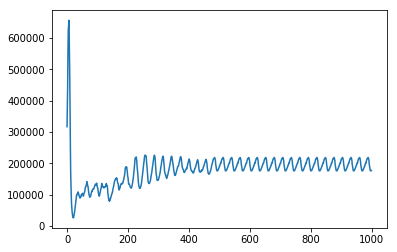

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(scores)

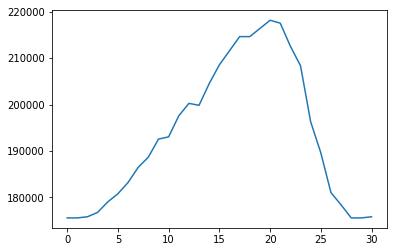

In [59]:
plt.plot(scores[-32:-1])

In [60]:
scores[-29:]

[176782,
 179034,
 180800,
 183218,
 186472,
 188679,
 192560,
 193050,
 197568,
 200260,
 199841,
 204516,
 208547,
 211584,
 214635,
 214635,
 216389,
 218160,
 217540,
 212576,
 208362,
 196305,
 189610,
 181044,
 178398,
 175593,
 175593,
 175840,
 176782]

In [61]:
(1000000000 - 1000) % 28

0

Answer is therefore the same as `play(world, time=1000)`